In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
filepath = Path("us_in_bm3108_favourite_sport.csv")
fav_sport = pd.read_csv(filepath, header = 0)

In [10]:
fav_sport = fav_sport.drop(columns = ['Unnamed: 0'])
fav_sport.head()

,favourite_sport
0,Padel
1,"Football, American Football"
2,Gymnastics
3,Ski
4,Table tennis


In [62]:
sports_grouped = fav_sport['favourite_sport'].value_counts()
sports_grouped

favourite_sport
Football                        6
Padel                           2
Ski                             2
Tennis                          2
Football                        1
football                        1
Running                         1
Basketball                      1
Ice hockey                      1
tennis                          1
Formula One                     1
Tennis and football             1
Jiu jitsu                       1
Tennis                          1
Walking                         1
Football, American Football     1
Cricket                         1
Alpine skiing                   1
Volleyball                      1
Boxing                          1
Table tennis                    1
Gymnastics                      1
Athletics                       1
Name: count, dtype: int64

In [74]:
#we can see some values are simillar and repeating, we going to use sql analog of LIKE function to group them
footbal = fav_sport['favourite_sport'].str.contains("Foot", case=False)        
tennis = fav_sport['favourite_sport'].str.contains("tenn", case=False) 

final_sports = ({'Football': footbal.sum() + 2,
 'Padel': 2,
 'Ski': 2,
 'Tennis': tennis.sum() + 1,
 'Running ': 1,
 'Basketball': 1,
 'Ice hockey': 1,
 'Formula One': 1,
 'Jiu jitsu ': 1,
 'Walking': 1,
 'American Football ': 1,
 'Cricket ': 1,
 'Alpine skiing': 1,
 'Volleyball ': 1,
 'Boxing ': 1,
 'Table tennis ': 1,
 'Gymnastics ': 1,
 'Athletics ': 1})


In [84]:
counts_dict = fav_sport['favourite_sport'].value_counts(dropna=True).to_dict()


In [78]:
df_sports = pd.DataFrame(list(final_sports.items()), columns=['sport','count'])
df_sports.head()

,sport,count
0,Football,12
1,Padel,2
2,Ski,2
3,Tennis,7
4,Running,1


Text(0.5, 1.0, 'Favourite sport analysis')

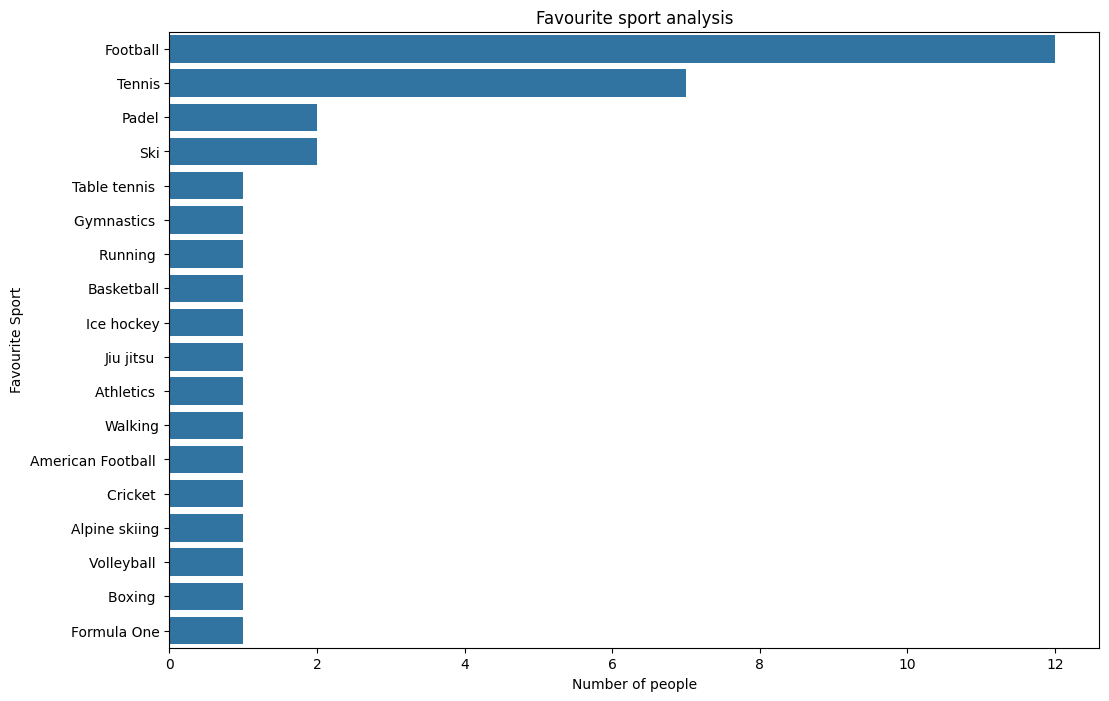

In [83]:
df_sports = df_sports.sort_values('count',ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(y = df_sports['sport'], x = df_sports['count']) 
plt.xlabel('Number of people')
plt.ylabel('Favourite Sport')
plt.title('Favourite sport analysis')

In [61]:
#Languages

filepath1 = Path("us_in_bm3108_2_numbers.csv")
numbers = pd.read_csv(filepath1, header = 0)

In [40]:
numbers.dropna(inplace = True)

In [42]:
numbers= numbers.drop(columns = ['Unnamed: 0'])

In [58]:
spoken_languages = numbers['num_spoken_languages'].value_counts()
spoken_languages.head()
program_languages = numbers['num_programming_languages'].value_counts()

Text(0.5, 1.0, 'Number of Programming Languages')

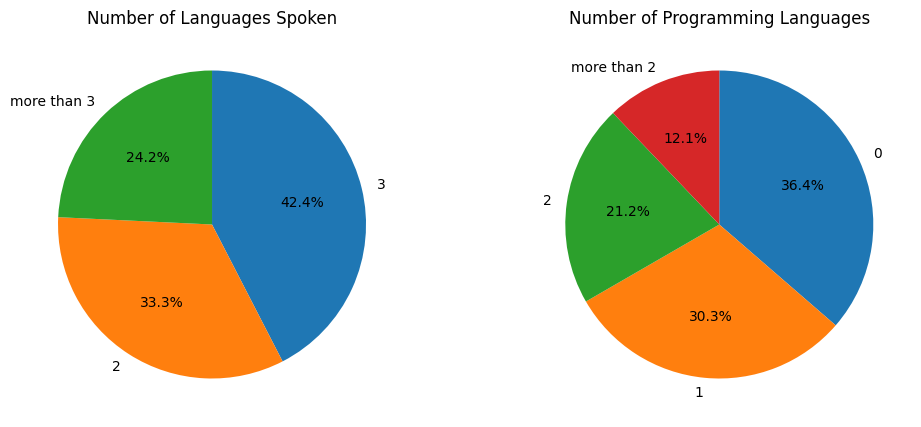

In [85]:
fig, axes = plt.subplots(1,2, figsize= (12,5))

axes[0].pie(spoken_languages, labels =spoken_languages.index, autopct='%1.1f%%', startangle=90, counterclock=False)
axes[0].set_title('Number of Languages Spoken')

axes[1].pie(program_languages, labels = program_languages.index, autopct = '%1.1f%%', startangle = 90, counterclock=False)
axes[1].set_title('Number of Programming Languages')